# Importing Libraries and Setting Up Environment

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from sklearn.model_selection import cross_val_score ,  GridSearchCV ,train_test_split ,ParameterGrid
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
%matplotlib inline

# Load Data

In [4]:
companies = pd.read_csv("companies.csv")
countries = pd.read_csv("countries.csv")
genres = pd.read_csv("genres.csv")   
langs = pd.read_csv("langs.csv")
movie_details = pd.read_csv("movie_details.csv")

# Rename column

In [6]:
companies=companies.rename(columns={"country": "country_of_company"})

# Merge datasets

In [8]:
movie_details = pd.merge(movie_details, companies, left_on="id", right_on="movie_id", how="left")
movie_details.drop(columns=["movie_id"], inplace=True)

movie_details = pd.merge(movie_details, countries, left_on="id", right_on="movie_id", how="left")
movie_details.drop(columns=["movie_id"], inplace=True)

movie_details = pd.merge(movie_details, genres, left_on="id", right_on="movie_id", how="left")
movie_details.drop(columns=["movie_id"], inplace=True)

movie_details = pd.merge(movie_details, langs, left_on="id", right_on="movie_id", how="left")
movie_details.drop(columns=["movie_id"], inplace=True)

In [9]:
df=movie_details

# number of rows and columns

In [11]:
df.shape

(64876, 26)

# Columns in dataset

In [13]:
df.columns.tolist()

['adult',
 'backdrop_path',
 'belongs_to_collection',
 'budget',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'company_name',
 'country_of_company',
 'country',
 'genre',
 'lang']

# Print first 5 rows

In [15]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,company_name,country_of_company,country,genre,lang
0,False,/9mJ9dxCGpudxyBtlC0M9Y4pTyXN.jpg,The Wild Robot Collection,78000000,https://www.thewildrobotmovie.com,1184918,tt29623480,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",...,Discover your true nature.,The Wild Robot,False,8.36,4117,DreamWorks Animation,US,US,Animation,English
1,False,/9mJ9dxCGpudxyBtlC0M9Y4pTyXN.jpg,The Wild Robot Collection,78000000,https://www.thewildrobotmovie.com,1184918,tt29623480,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",...,Discover your true nature.,The Wild Robot,False,8.36,4117,DreamWorks Animation,US,US,Action,English
2,False,/9mJ9dxCGpudxyBtlC0M9Y4pTyXN.jpg,The Wild Robot Collection,78000000,https://www.thewildrobotmovie.com,1184918,tt29623480,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",...,Discover your true nature.,The Wild Robot,False,8.36,4117,DreamWorks Animation,US,US,Science Fiction,English
3,False,/9mJ9dxCGpudxyBtlC0M9Y4pTyXN.jpg,The Wild Robot Collection,78000000,https://www.thewildrobotmovie.com,1184918,tt29623480,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",...,Discover your true nature.,The Wild Robot,False,8.36,4117,DreamWorks Animation,US,US,Family,English
4,False,/au3o84ub27qTZiMiEc9UYzN74V3.jpg,False,18000000,https://www.elevationmovie.com,1035048,tt23558280,en,Elevation,A single father and two women venture from the...,...,Don't go down without a fight.,Elevation,False,6.30,376,Lyrical Media,US,US,Action,English


# Make genres for each movie in one cell

In [17]:
df['genre'] = df['genre'].fillna("")
df = df.groupby("id").agg({
    'company_name': 'first',
    'adult': 'first',
    'backdrop_path': 'first',
    'budget': 'first',
    'homepage': 'first',
    'imdb_id': 'first',
    'original_language': 'first',
    'original_title': 'first',
    'overview': 'first',
    'popularity': 'first',
    'poster_path': 'first',
    'release_date': 'first',
    'revenue': 'first',
    'runtime': 'first',
    'status': 'first',
    'tagline': 'first',
    'video': 'first',
    'vote_average': 'first',
    'vote_count': 'first',
    'country': 'first',
    'belongs_to_collection' : 'first',
    'country_of_company' : 'first',
    'title' :'first',
    'lang' : 'first',
    'genre': lambda x: ','.join(x.unique())
}).reset_index()


# Number of rows and columns after combine genres in one cell

In [19]:
df.shape

(2988, 26)

# print first 10 rows

In [21]:
df.head(10)

,id,company_name,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,...,tagline,video,vote_average,vote_count,country,belongs_to_collection,country_of_company,title,lang,genre
0,11,Lucasfilm Ltd.,False,/4qCqAdHcNKeAHcK8tJ8wNJZa9cx.jpg,11000000,http://www.starwars.com/films/star-wars-episod...,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,"A long time ago in a galaxy far, far away...",False,8.204,20817,US,Star Wars Collection,US,Star Wars,English,"Adventure,Action,Science Fiction"
1,12,Pixar,False,/eCynaAOgYYiw5yN5lBwz3IxqvaW.jpg,94000000,http://movies.disney.com/finding-nemo,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",...,There are 3.7 trillion fish in the ocean. They...,False,7.800,19388,US,Finding Nemo Collection,US,Finding Nemo,English,"Animation,Family"
2,13,Paramount Pictures,False,/mzfx54nfDPTUXZOG48u4LaEheDy.jpg,55000000,https://www.paramountmovies.com/movies/forrest...,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,...,The world will never be the same once you've s...,False,8.500,27752,US,False,US,Forrest Gump,English,"Comedy,Drama,Romance"
3,14,DreamWorks Pictures,False,/DztBnZaqmla2sGUW9s8AyOmskT.jpg,15000000,None,tt0169547,en,American Beauty,"Lester Burnham, a depressed suburban father in...",...,Look closer.,False,8.000,12128,US,False,US,American Beauty,English,Drama
4,15,Mercury Productions,False,/ruF3Lmd4A8MHbnEBE6lxPMbsHGL.jpg,839727,None,tt0033467,en,Citizen Kane,Newspaper magnate Charles Foster Kane is taken...,...,Some called him a hero...others called him a h...,False,8.000,5566,US,False,US,Citizen Kane,English,"Mystery,Drama"
5,18,Gaumont,False,/wgvc3PmjQGtYYDWaeuV867mnFDs.jpg,90000000,https://www.sonypictures.com/movies/thefifthel...,tt0119116,fr,Le Cinquième Élément,"In 2257, a taxi driver is unintentionally give...",...,There is no future without it.,False,7.555,10824,FR,False,FR,The Fifth Element,English,"Science Fiction,Action,Adventure"
6,19,UFA,False,/eeMoFKxjjiCi6iep2GEZtSAMYIr.jpg,5300000,None,tt0017136,de,Metropolis,In a futuristic city sharply divided between t...,...,There can be no understanding between the hand...,False,8.114,2792,DE,False,DE,Metropolis,No Language,"Drama,Science Fiction"
7,22,Walt Disney Pictures,False,/wW7Wt5bXzPy4VOEE4LTIUDyDgBo.jpg,140000000,https://movies.disney.com/pirates-of-the-carib...,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,After Port Royal is attacked and pillaged by a...,...,Prepare to be blown out of the water.,False,7.800,20809,US,Pirates of the Caribbean Collection,US,Pirates of the Caribbean: The Curse of the Bla...,English,"Adventure,Fantasy,Action"
8,24,Miramax,False,/p3WiF8qYS7Qp17YRYgrFh7gf9P9.jpg,30000000,http://www.miramax.com/movie/kill-bill-volume-1,tt0266697,en,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",...,A roaring rampage of revenge.,False,8.000,17552,US,Kill Bill Collection,US,Kill Bill: Vol. 1,English,"Action,Crime"
9,27,Revolution Films,False,/qU7tNIMpRqkizIObXfkJY3haTqh.jpg,1000000,None,tt0411705,en,9 Songs,"Matt, a young glaciologist, soars across the v...",...,"2 lovers, one summer, and the 9 songs that def...",False,5.600,518,US,False,GB,9 Songs,English,"Drama,Music,Romance"


# Number of unique values in each column

In [23]:
for col in df.columns:
    if col != 'genre':
        print(col, ":", df[col].nunique())

id : 2988
company_name : 1341
adult : 1
backdrop_path : 2950
budget : 358
homepage : 1760
imdb_id : 2939
original_language : 42
original_title : 2937
overview : 2967
popularity : 2910
poster_path : 2985
release_date : 2260
revenue : 2055
runtime : 181
status : 4
tagline : 2416
video : 1
vote_average : 1257
vote_count : 2171
country : 56
belongs_to_collection : 585
country_of_company : 53
title : 2924
lang : 61


# Drop some column

In [25]:
drop_cols = [
    'id' ,
    'imdb_id' ,
    'adult' ,
    'video' ,
    'homepage' ,
    'poster_path',
    'backdrop_path' ,
    'title' ,
    'original_title' ,
    'overview' ,
    'tagline' ,
    'status' ,
    'lang'
]

df.drop(columns=drop_cols, axis=1 , inplace=True)

# Print first 5 rows

In [27]:
df.head()

,company_name,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,genre
0,Lucasfilm Ltd.,11000000,en,106.348,1977-05-25,775398007,121,8.204,20817,US,Star Wars Collection,US,"Adventure,Action,Science Fiction"
1,Pixar,94000000,en,125.133,2003-05-30,940335536,100,7.800,19388,US,Finding Nemo Collection,US,"Animation,Family"
2,Paramount Pictures,55000000,en,105.101,1994-06-23,677387716,142,8.500,27752,US,False,US,"Comedy,Drama,Romance"
3,DreamWorks Pictures,15000000,en,44.255,1999-09-15,356296601,122,8.000,12128,US,False,US,Drama
4,Mercury Productions,839727,en,37.402,1941-04-17,23218000,119,8.000,5566,US,False,US,"Mystery,Drama"


# Information about the data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_name           2898 non-null   object 
 1   budget                 2988 non-null   int64  
 2   original_language      2988 non-null   object 
 3   popularity             2988 non-null   float64
 4   release_date           2980 non-null   object 
 5   revenue                2988 non-null   int64  
 6   runtime                2988 non-null   int64  
 7   vote_average           2988 non-null   float64
 8   vote_count             2988 non-null   int64  
 9   country                2988 non-null   object 
 10  belongs_to_collection  2988 non-null   object 
 11  country_of_company     2818 non-null   object 
 12  genre                  2988 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 303.6+ KB


# Convert datatype of release_date to datetime

In [31]:
df['release_date']=pd.to_datetime(df['release_date'])

# Encode belongs_to_collection to (1,0)

In [33]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x =='False' else 1)

# print first 5 rows

In [35]:
df.head()

,company_name,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,genre
0,Lucasfilm Ltd.,11000000,en,106.348,1977-05-25,775398007,121,8.204,20817,US,1,US,"Adventure,Action,Science Fiction"
1,Pixar,94000000,en,125.133,2003-05-30,940335536,100,7.800,19388,US,1,US,"Animation,Family"
2,Paramount Pictures,55000000,en,105.101,1994-06-23,677387716,142,8.500,27752,US,0,US,"Comedy,Drama,Romance"
3,DreamWorks Pictures,15000000,en,44.255,1999-09-15,356296601,122,8.000,12128,US,0,US,Drama
4,Mercury Productions,839727,en,37.402,1941-04-17,23218000,119,8.000,5566,US,0,US,"Mystery,Drama"


# Describe data

In [37]:
df.describe(include='all')

,company_name,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,genre
count,2898,2.988000e+03,2988,2988.000000,2980,2.988000e+03,2988.000000,2988.000000,2988.000000,2988,2988.000000,2818,2988
unique,1341,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,53,1004
top,Paramount Pictures,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,US,Drama
freq,95,NaN,2322,NaN,NaN,NaN,NaN,NaN,NaN,2001,NaN,1961,115
mean,NaN,4.088657e+07,NaN,71.187226,2012-06-12 06:24:38.657718016,1.490740e+08,106.056225,6.625673,3906.435074,NaN,0.379518,NaN,NaN
min,NaN,0.000000e+00,NaN,31.375000,1922-02-16 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000e+00,NaN,37.820000,2006-08-02 18:00:00,0.000000e+00,93.000000,6.200000,244.000000,NaN,0.000000,NaN,NaN
50%,NaN,1.500000e+07,NaN,48.579000,2016-07-28 12:00:00,4.027773e+07,105.000000,6.800000,2146.500000,NaN,0.000000,NaN,NaN
75%,NaN,6.000000e+07,NaN,72.310000,2023-07-14 00:00:00,1.942677e+08,121.000000,7.380000,5647.500000,NaN,1.000000,NaN,NaN
max,NaN,4.600000e+08,NaN,877.206000,2027-05-05 00:00:00,2.923706e+09,700.000000,10.000000,36930.000000,NaN,1.000000,NaN,NaN


In [38]:
categorical_cols=df.select_dtypes(include=['object']).columns
numeric_cols=df.select_dtypes(include=['int' ,'float']).columns

# Handle Duplicates

In [40]:
df.duplicated().sum()

0

# check if the data is null and count the number of nulls

In [42]:
df.isnull().sum()

company_name              90
budget                     0
original_language          0
popularity                 0
release_date               8
revenue                    0
runtime                    0
vote_average               0
vote_count                 0
country                    0
belongs_to_collection      0
country_of_company       170
genre                      0
dtype: int64

# Handle nulls

In [44]:
df['country_of_company']=df['country_of_company'].fillna(df['country'])

In [45]:
df['company_name']=df['company_name'].fillna(df.groupby('country_of_company')['company_name'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [46]:
df.dropna(subset=['release_date','company_name'] , inplace=True)

In [47]:
df.isnull().sum()

company_name             0
budget                   0
original_language        0
popularity               0
release_date             0
revenue                  0
runtime                  0
vote_average             0
vote_count               0
country                  0
belongs_to_collection    0
country_of_company       0
genre                    0
dtype: int64

# split release_date to (release_year,release_month,release_day)

In [49]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

df.drop('release_date' , axis=1 , inplace=True)

In [50]:
for col in df.columns:
    print(col , df[col].unique())

company_name ['Lucasfilm Ltd.' 'Pixar' 'Paramount Pictures' ... 'Moboreels'
 'Señor Mono' 'ReelShort']
budget [ 11000000  94000000  55000000  15000000    839727  90000000   5300000
 140000000  30000000   1000000  31500000  14400000  75000000  20000000
 200000000  12000000  29000000  41000000   5000000 132000000  70000000
   2500000   9000000  28000000  18000000   6000000  48000000 103000000
  16000000   1900000  19000000  10000000         0  25000000  14000000
 150000000  93000000  79000000  23500000  14600000   4500000   1448864
  17000000   5700000  45000000   4000000 185000000  85000000 110000000
  40000000  35000000   8000000   1200000 102000000   2200000  65000000
  72000000  16400000   6400000   2883848  13000000  54000000  22000000
   3000000   7000000 207000000 300000000    878000  80000000  12500000
  63000000   2000000   1800000    397751    200000  49000000   1488423
 180000000 100000000 125000000  59000000   2479000   4650000  58000000
  14500000   9500000  60000000  420000

# Calculate mean of revenue

In [52]:
mean_revenue = df['revenue'].mean()

# visualization

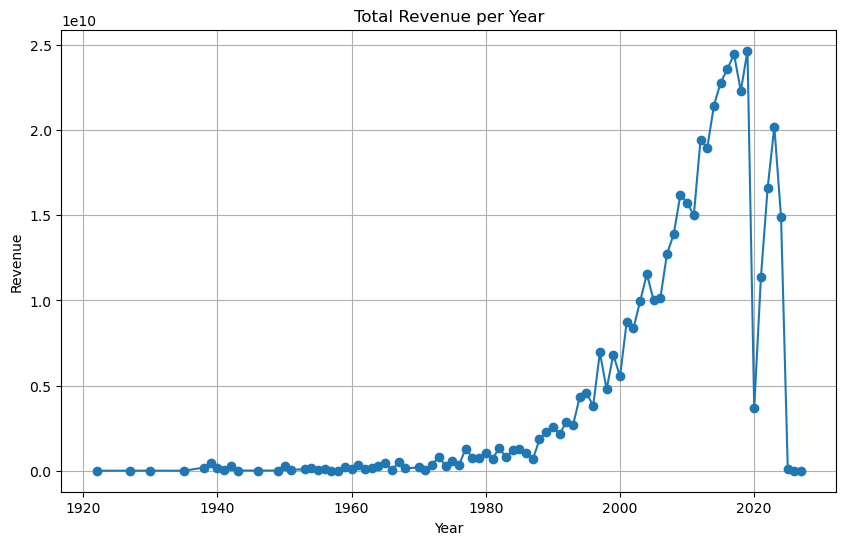

In [54]:
yearly_revenue = df.groupby(df['release_year'])['revenue'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig('Total_Revenue_per_Year.png')
plt.show()

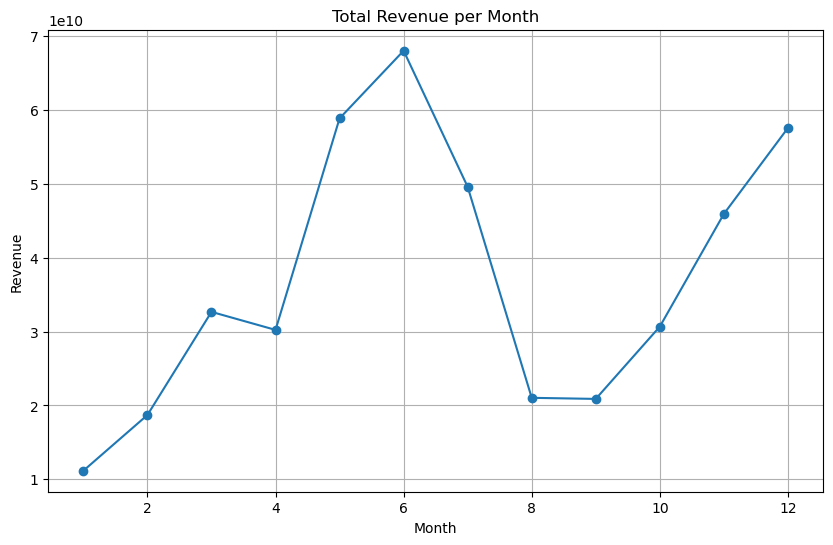

In [55]:
yearly_revenue = df.groupby(df['release_month'])['revenue'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig('Total_Revenue_per_Month.png')
plt.show()

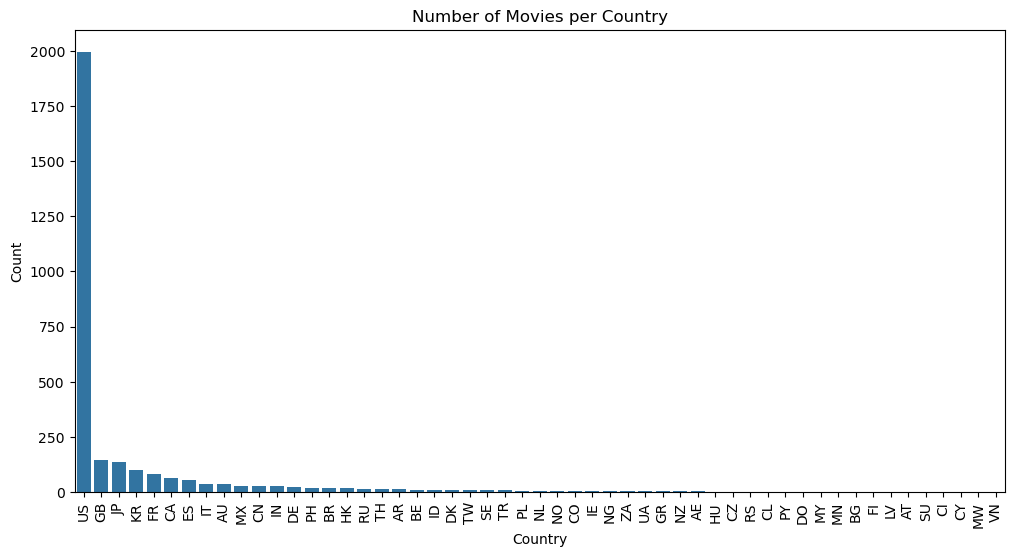

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Number of Movies per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig('Number_of_Movies_per_Country.png')
plt.show()

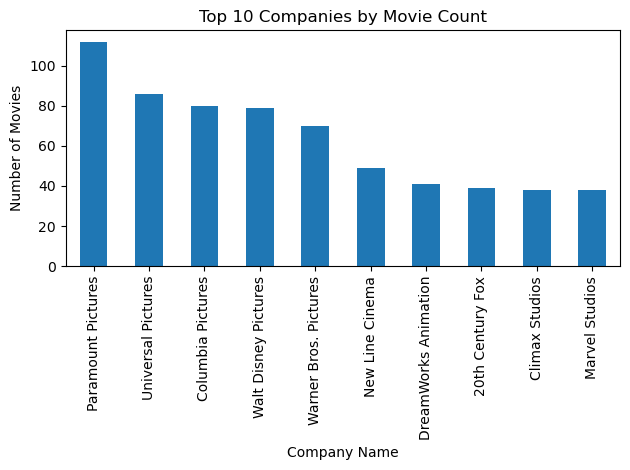

In [57]:
df['company_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Companies by Movie Count")
plt.xlabel("Company Name")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("Top_10_Companies_by_Movie_Count.png")
plt.show()

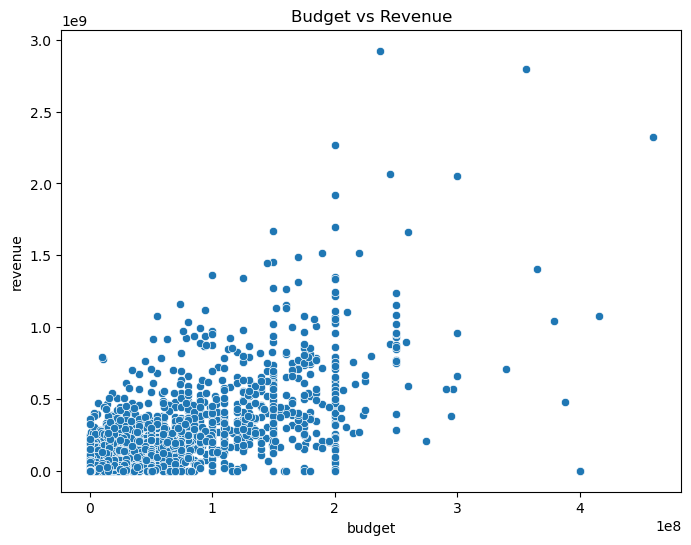

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.savefig('Budget_vs_Revenue.png')
plt.show()

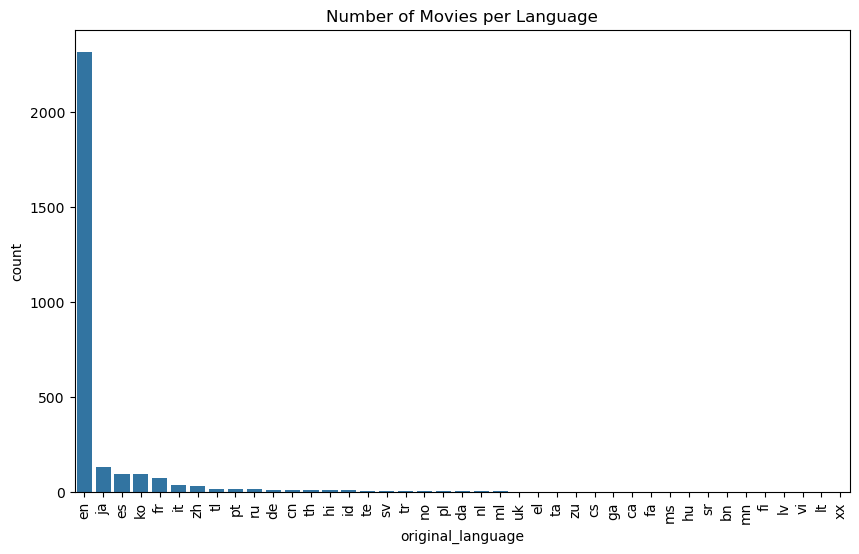

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='original_language', order=df['original_language'].value_counts().index)
plt.title('Number of Movies per Language')
plt.xticks(rotation=90)
plt.savefig('Number_of_Movies_per_Language.png')
plt.show()

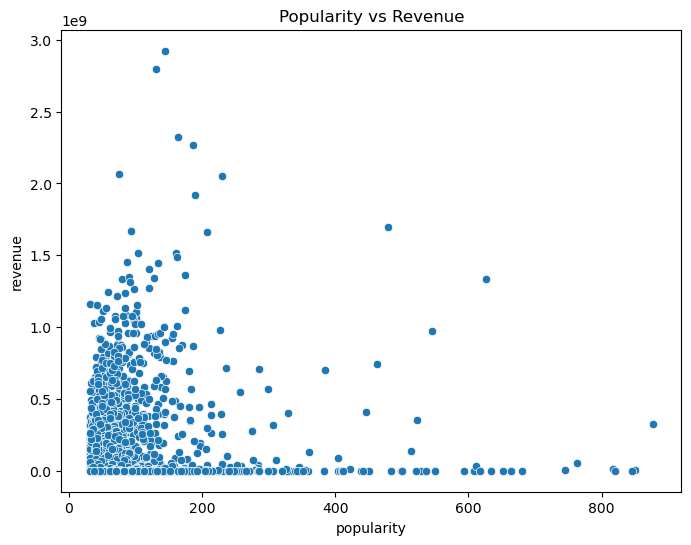

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')
plt.savefig('Popularity_vs_Revenue.png')
plt.show()

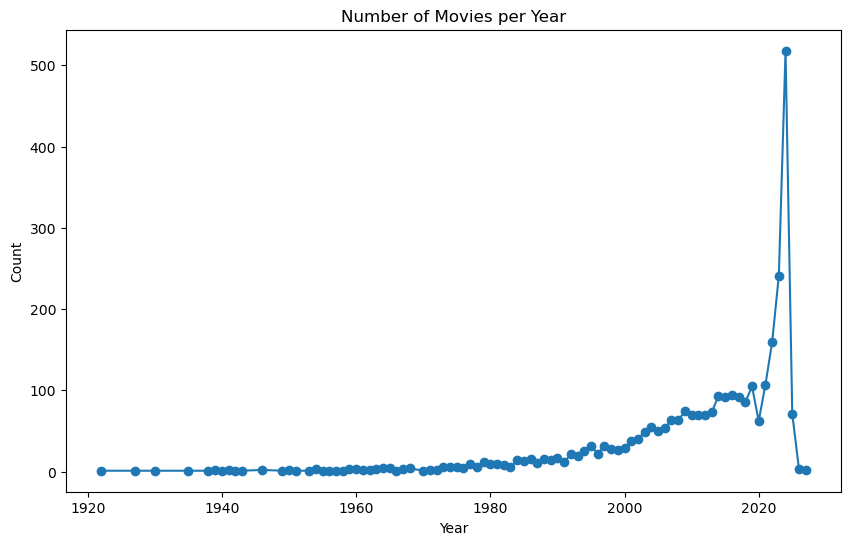

In [61]:
plt.figure(figsize=(10,6))
movies_per_year = df.groupby(df['release_year']).size()
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('Number_of_Movies_per_Year.png')
plt.show()

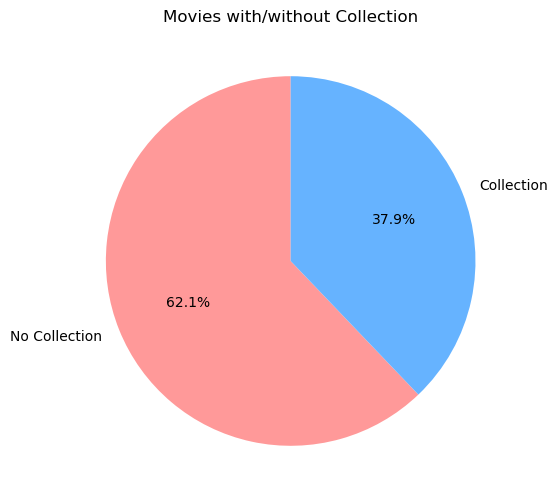

In [62]:
counts = df['belongs_to_collection'].value_counts()

labels = ['No Collection', 'Collection']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Movies with/without Collection")
plt.savefig("Pie_chart_collection.png")
plt.show()

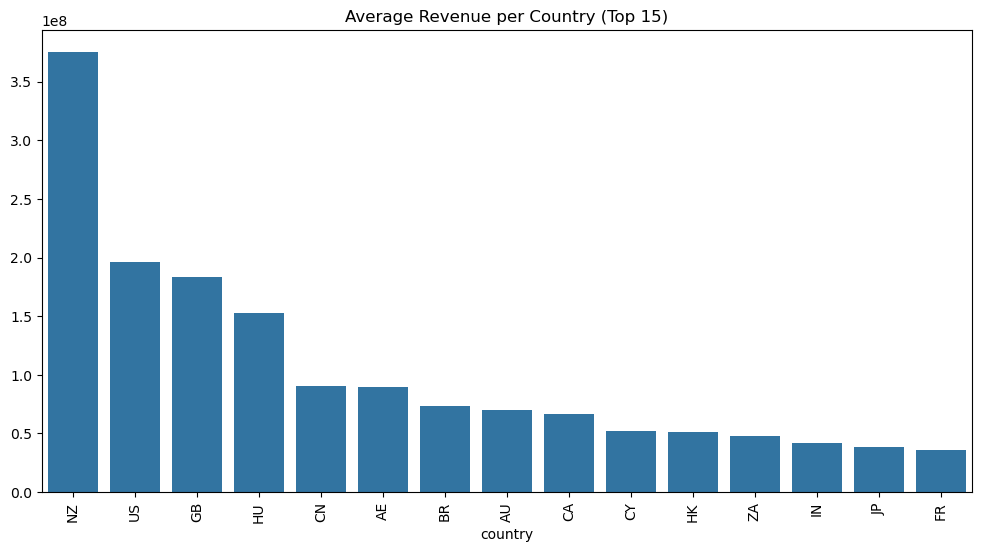

In [63]:
plt.figure(figsize=(12,6))
avg_revenue_country = df.groupby('country')['revenue'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_revenue_country.index, y=avg_revenue_country.values)
plt.title('Average Revenue per Country (Top 15)')
plt.xticks(rotation=90)
plt.savefig('Average_Revenue_per_Country_(Top 15).png')
plt.show()

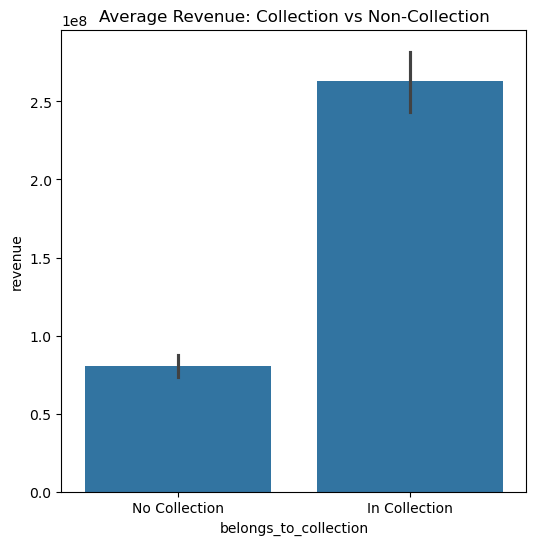

In [64]:
plt.figure(figsize=(6,6))
sns.barplot(data=df, x='belongs_to_collection', y='revenue')
plt.title('Average Revenue: Collection vs Non-Collection')
plt.xticks([0,1], ['No Collection', 'In Collection'])
plt.savefig('Average_Revenue_Collection_vs_Non-Collection.png')
plt.show()

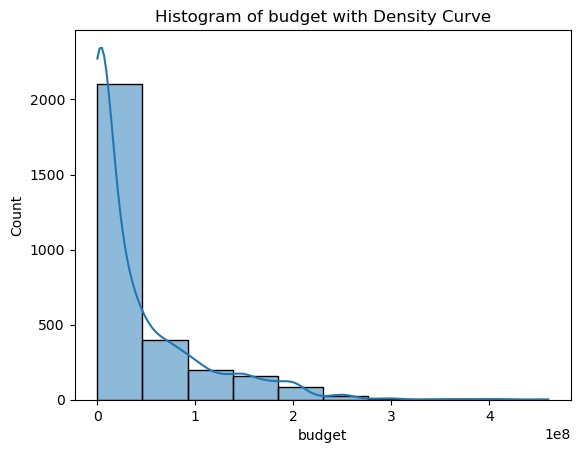

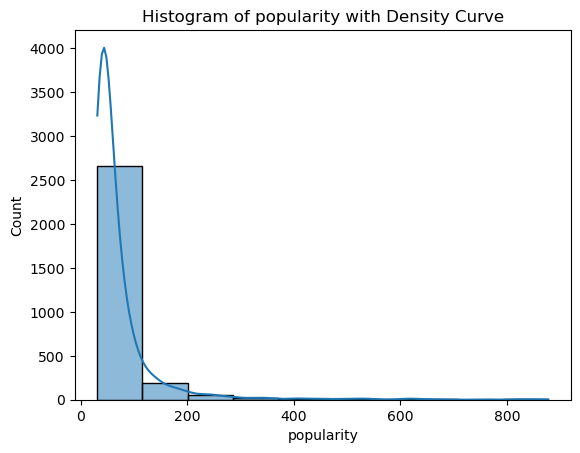

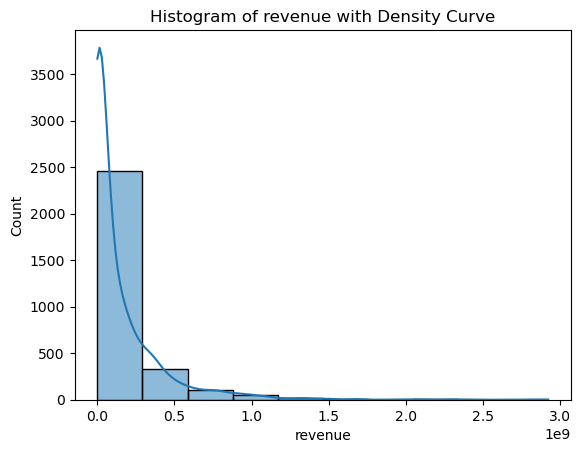

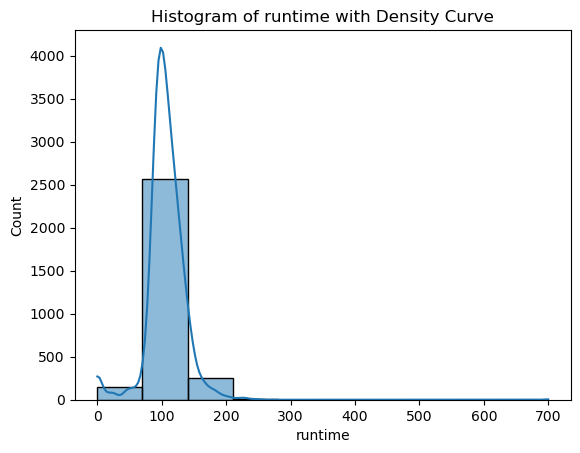

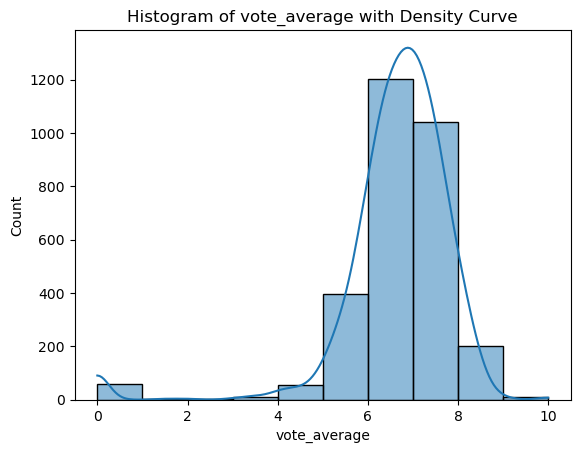

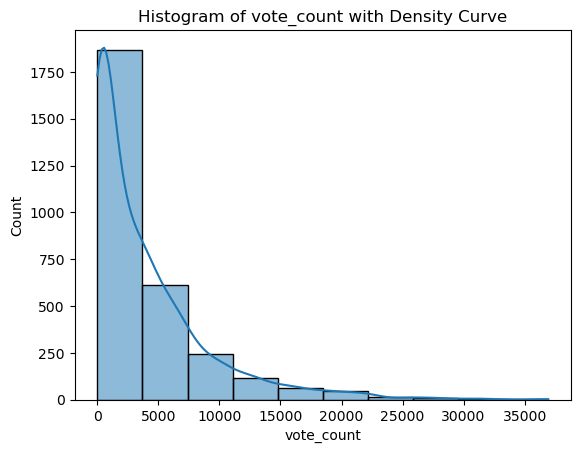

In [65]:
for col in ['budget','popularity' ,'revenue' , 'runtime' , 'vote_average' , 'vote_count']:
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram of {col} with Density Curve")
    plt.savefig(f'Histogram_{col}.png')
    plt.show()

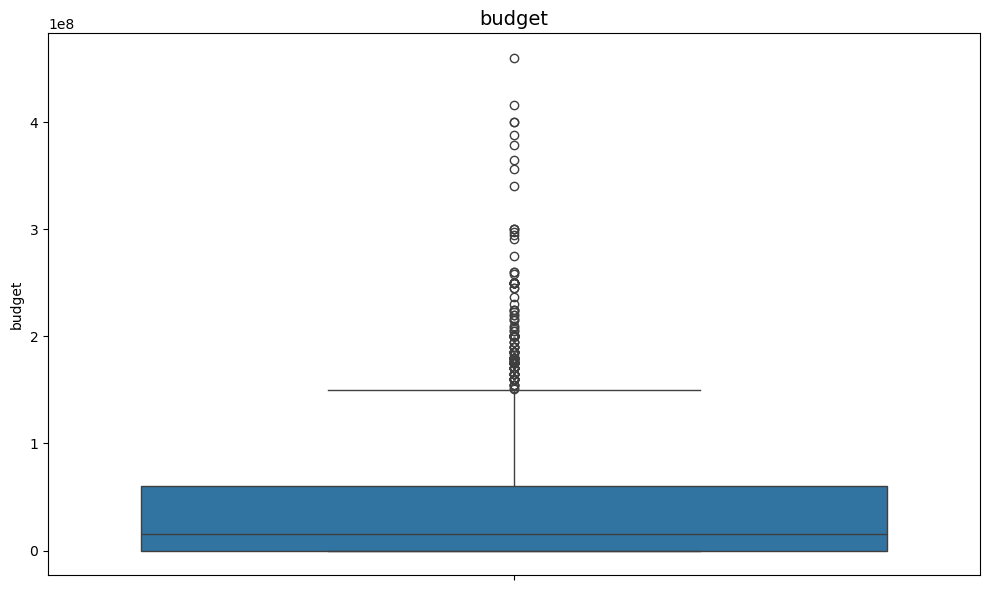

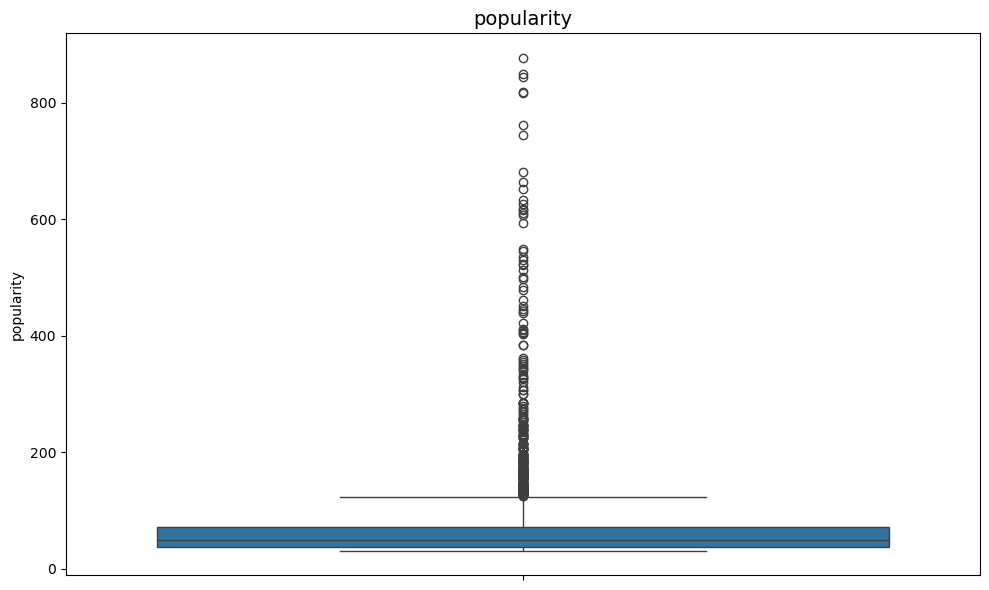

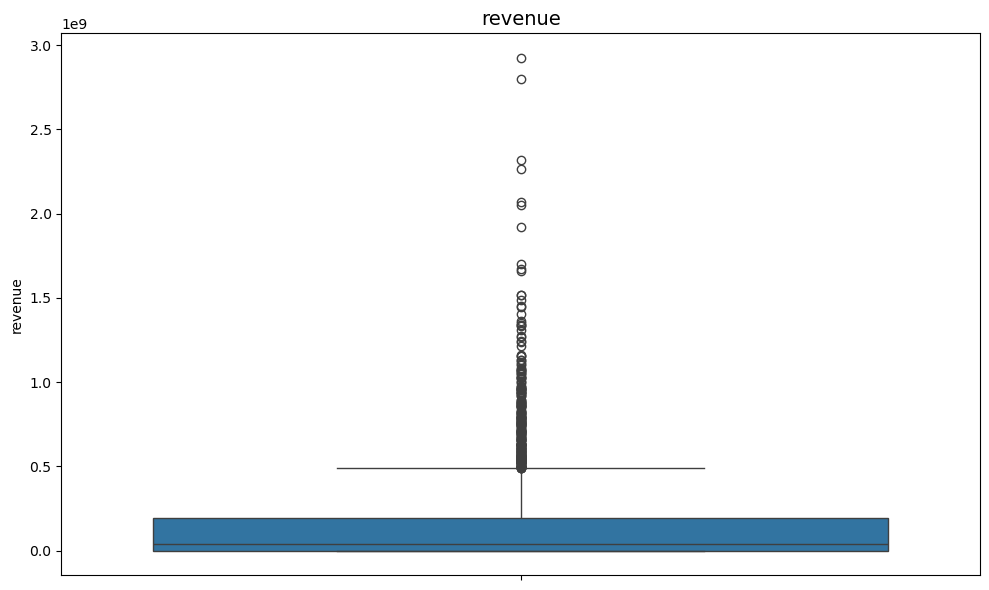

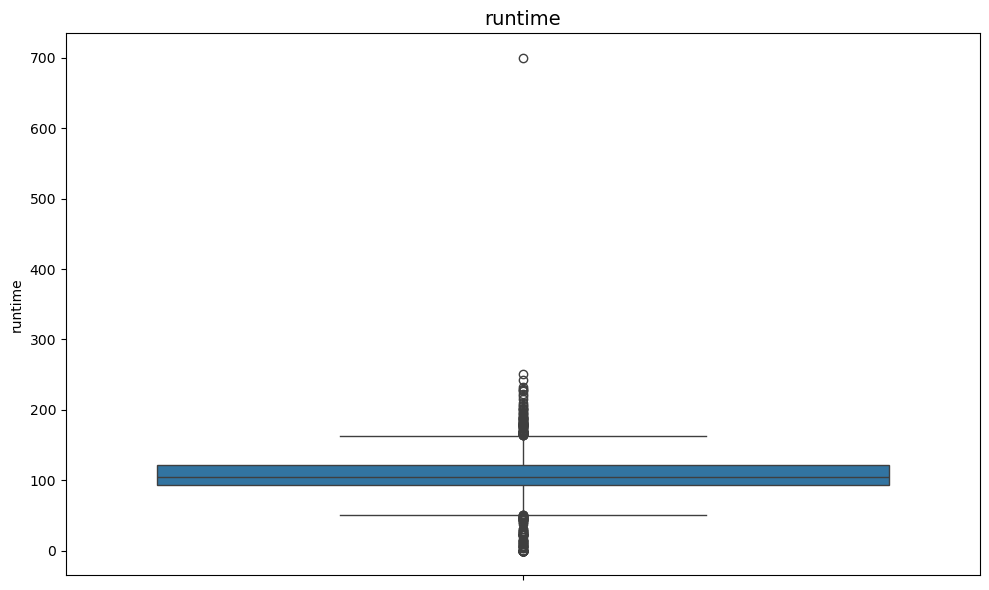

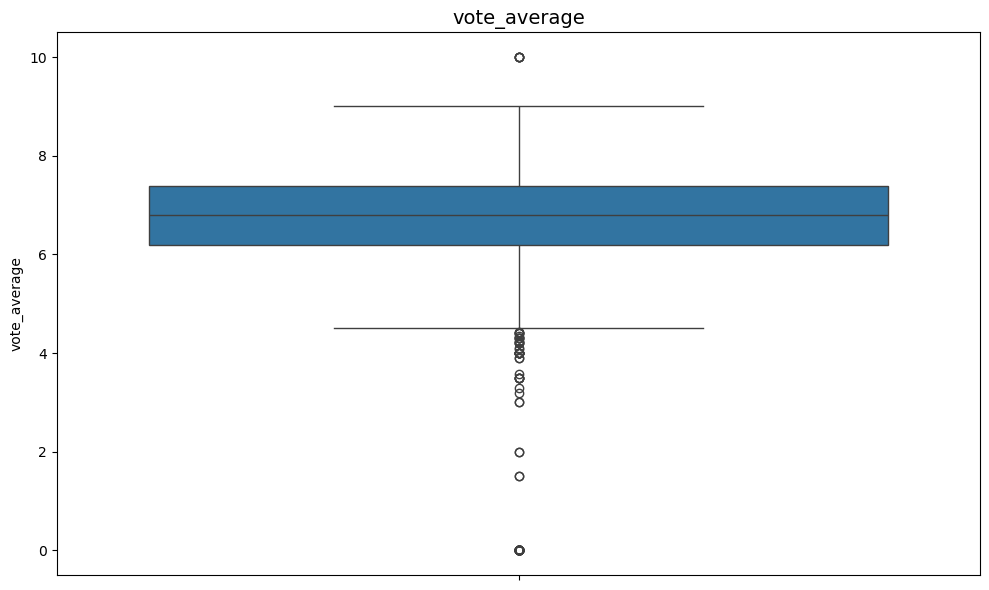

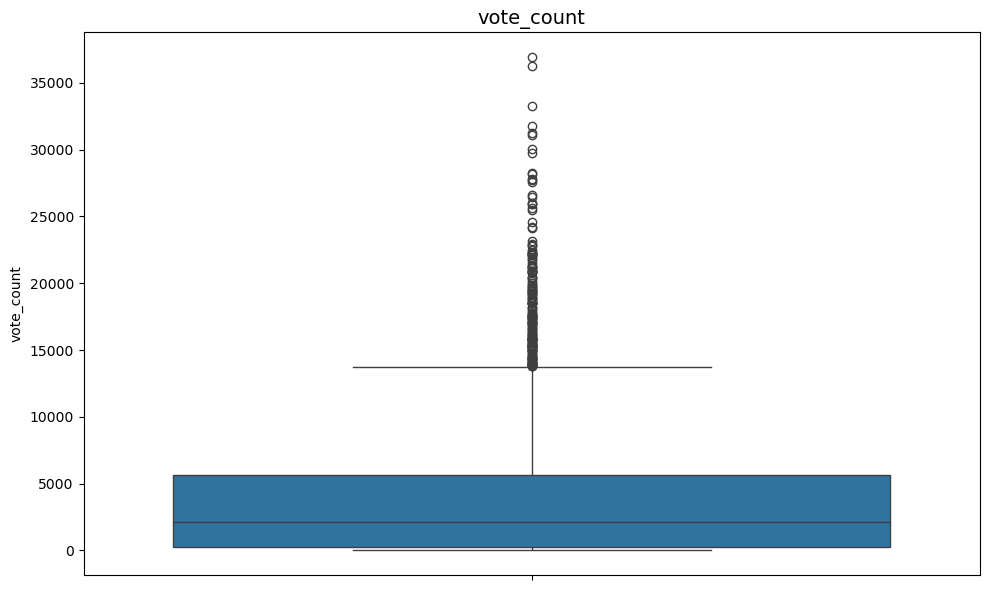

In [66]:
for col in ['budget','popularity' ,'revenue' , 'runtime' , 'vote_average' , 'vote_count']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'{col}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'boxplot_{col}.png')
    plt.show()

In [67]:
df.columns

Index(['company_name', 'budget', 'original_language', 'popularity', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'country',
       'belongs_to_collection', 'country_of_company', 'genre', 'release_year',
       'release_month', 'release_day'],
      dtype='object')

# Handle outliers

In [69]:
cols = ['budget','popularity','revenue','runtime','vote_average','vote_count']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# make target enconding

In [71]:
categorical_cols = ['company_name', 'original_language', 'country' , 'country_of_company']

encoder = ce.TargetEncoder(cols=categorical_cols)

df_encoded = encoder.fit_transform(df[categorical_cols], df['revenue'])


df[categorical_cols] = df_encoded

df.head()

,company_name,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,genre,release_year,release_month,release_day
0,2.300751e+08,11000000.0,1.504500e+08,106.3480,488250000.0,121.0,8.204,13767.0,1.579761e+08,1,1.624391e+08,"Adventure,Action,Science Fiction",1977,5,25
1,2.534977e+08,94000000.0,1.504500e+08,124.2585,488250000.0,100.0,7.800,13767.0,1.579761e+08,1,1.624391e+08,"Animation,Family",2003,5,30
2,1.857424e+08,55000000.0,1.504500e+08,105.1010,488250000.0,142.0,8.500,13767.0,1.579761e+08,0,1.624391e+08,"Comedy,Drama,Romance",1994,6,23
3,1.562948e+08,15000000.0,1.504500e+08,44.2550,356296601.0,122.0,8.000,12128.0,1.579761e+08,0,1.624391e+08,Drama,1999,9,15
4,1.087500e+08,839727.0,1.504500e+08,37.4020,23218000.0,119.0,8.000,5566.0,1.579761e+08,0,1.624391e+08,"Mystery,Drama",1941,4,17


# convert genres to genres_count

In [73]:
df['genres_split'] = df['genre'].str.split(',')

df['genre_count'] = df['genres_split'].str.len()

df.drop(['genres_split','genre'],axis=1 , inplace=True)

df.head()

,company_name,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,release_year,release_month,release_day,genre_count
0,2.300751e+08,11000000.0,1.504500e+08,106.3480,488250000.0,121.0,8.204,13767.0,1.579761e+08,1,1.624391e+08,1977,5,25,3
1,2.534977e+08,94000000.0,1.504500e+08,124.2585,488250000.0,100.0,7.800,13767.0,1.579761e+08,1,1.624391e+08,2003,5,30,2
2,1.857424e+08,55000000.0,1.504500e+08,105.1010,488250000.0,142.0,8.500,13767.0,1.579761e+08,0,1.624391e+08,1994,6,23,3
3,1.562948e+08,15000000.0,1.504500e+08,44.2550,356296601.0,122.0,8.000,12128.0,1.579761e+08,0,1.624391e+08,1999,9,15,1
4,1.087500e+08,839727.0,1.504500e+08,37.4020,23218000.0,119.0,8.000,5566.0,1.579761e+08,0,1.624391e+08,1941,4,17,2


# handle e in numeric columns

In [75]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].apply(lambda x: float(format(x,'f')) if pd.notnull(x) else x)

In [76]:
df.head()

,company_name,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,country,belongs_to_collection,country_of_company,release_year,release_month,release_day,genre_count
0,2.300751e+08,11000000.0,1.504500e+08,106.3480,488250000.0,121.0,8.204,13767.0,1.579761e+08,1.0,1.624391e+08,1977,5,25,3.0
1,2.534977e+08,94000000.0,1.504500e+08,124.2585,488250000.0,100.0,7.800,13767.0,1.579761e+08,1.0,1.624391e+08,2003,5,30,2.0
2,1.857424e+08,55000000.0,1.504500e+08,105.1010,488250000.0,142.0,8.500,13767.0,1.579761e+08,0.0,1.624391e+08,1994,6,23,3.0
3,1.562948e+08,15000000.0,1.504500e+08,44.2550,356296601.0,122.0,8.000,12128.0,1.579761e+08,0.0,1.624391e+08,1999,9,15,1.0
4,1.087500e+08,839727.0,1.504500e+08,37.4020,23218000.0,119.0,8.000,5566.0,1.579761e+08,0.0,1.624391e+08,1941,4,17,2.0


# Correlation Heatmap of Features

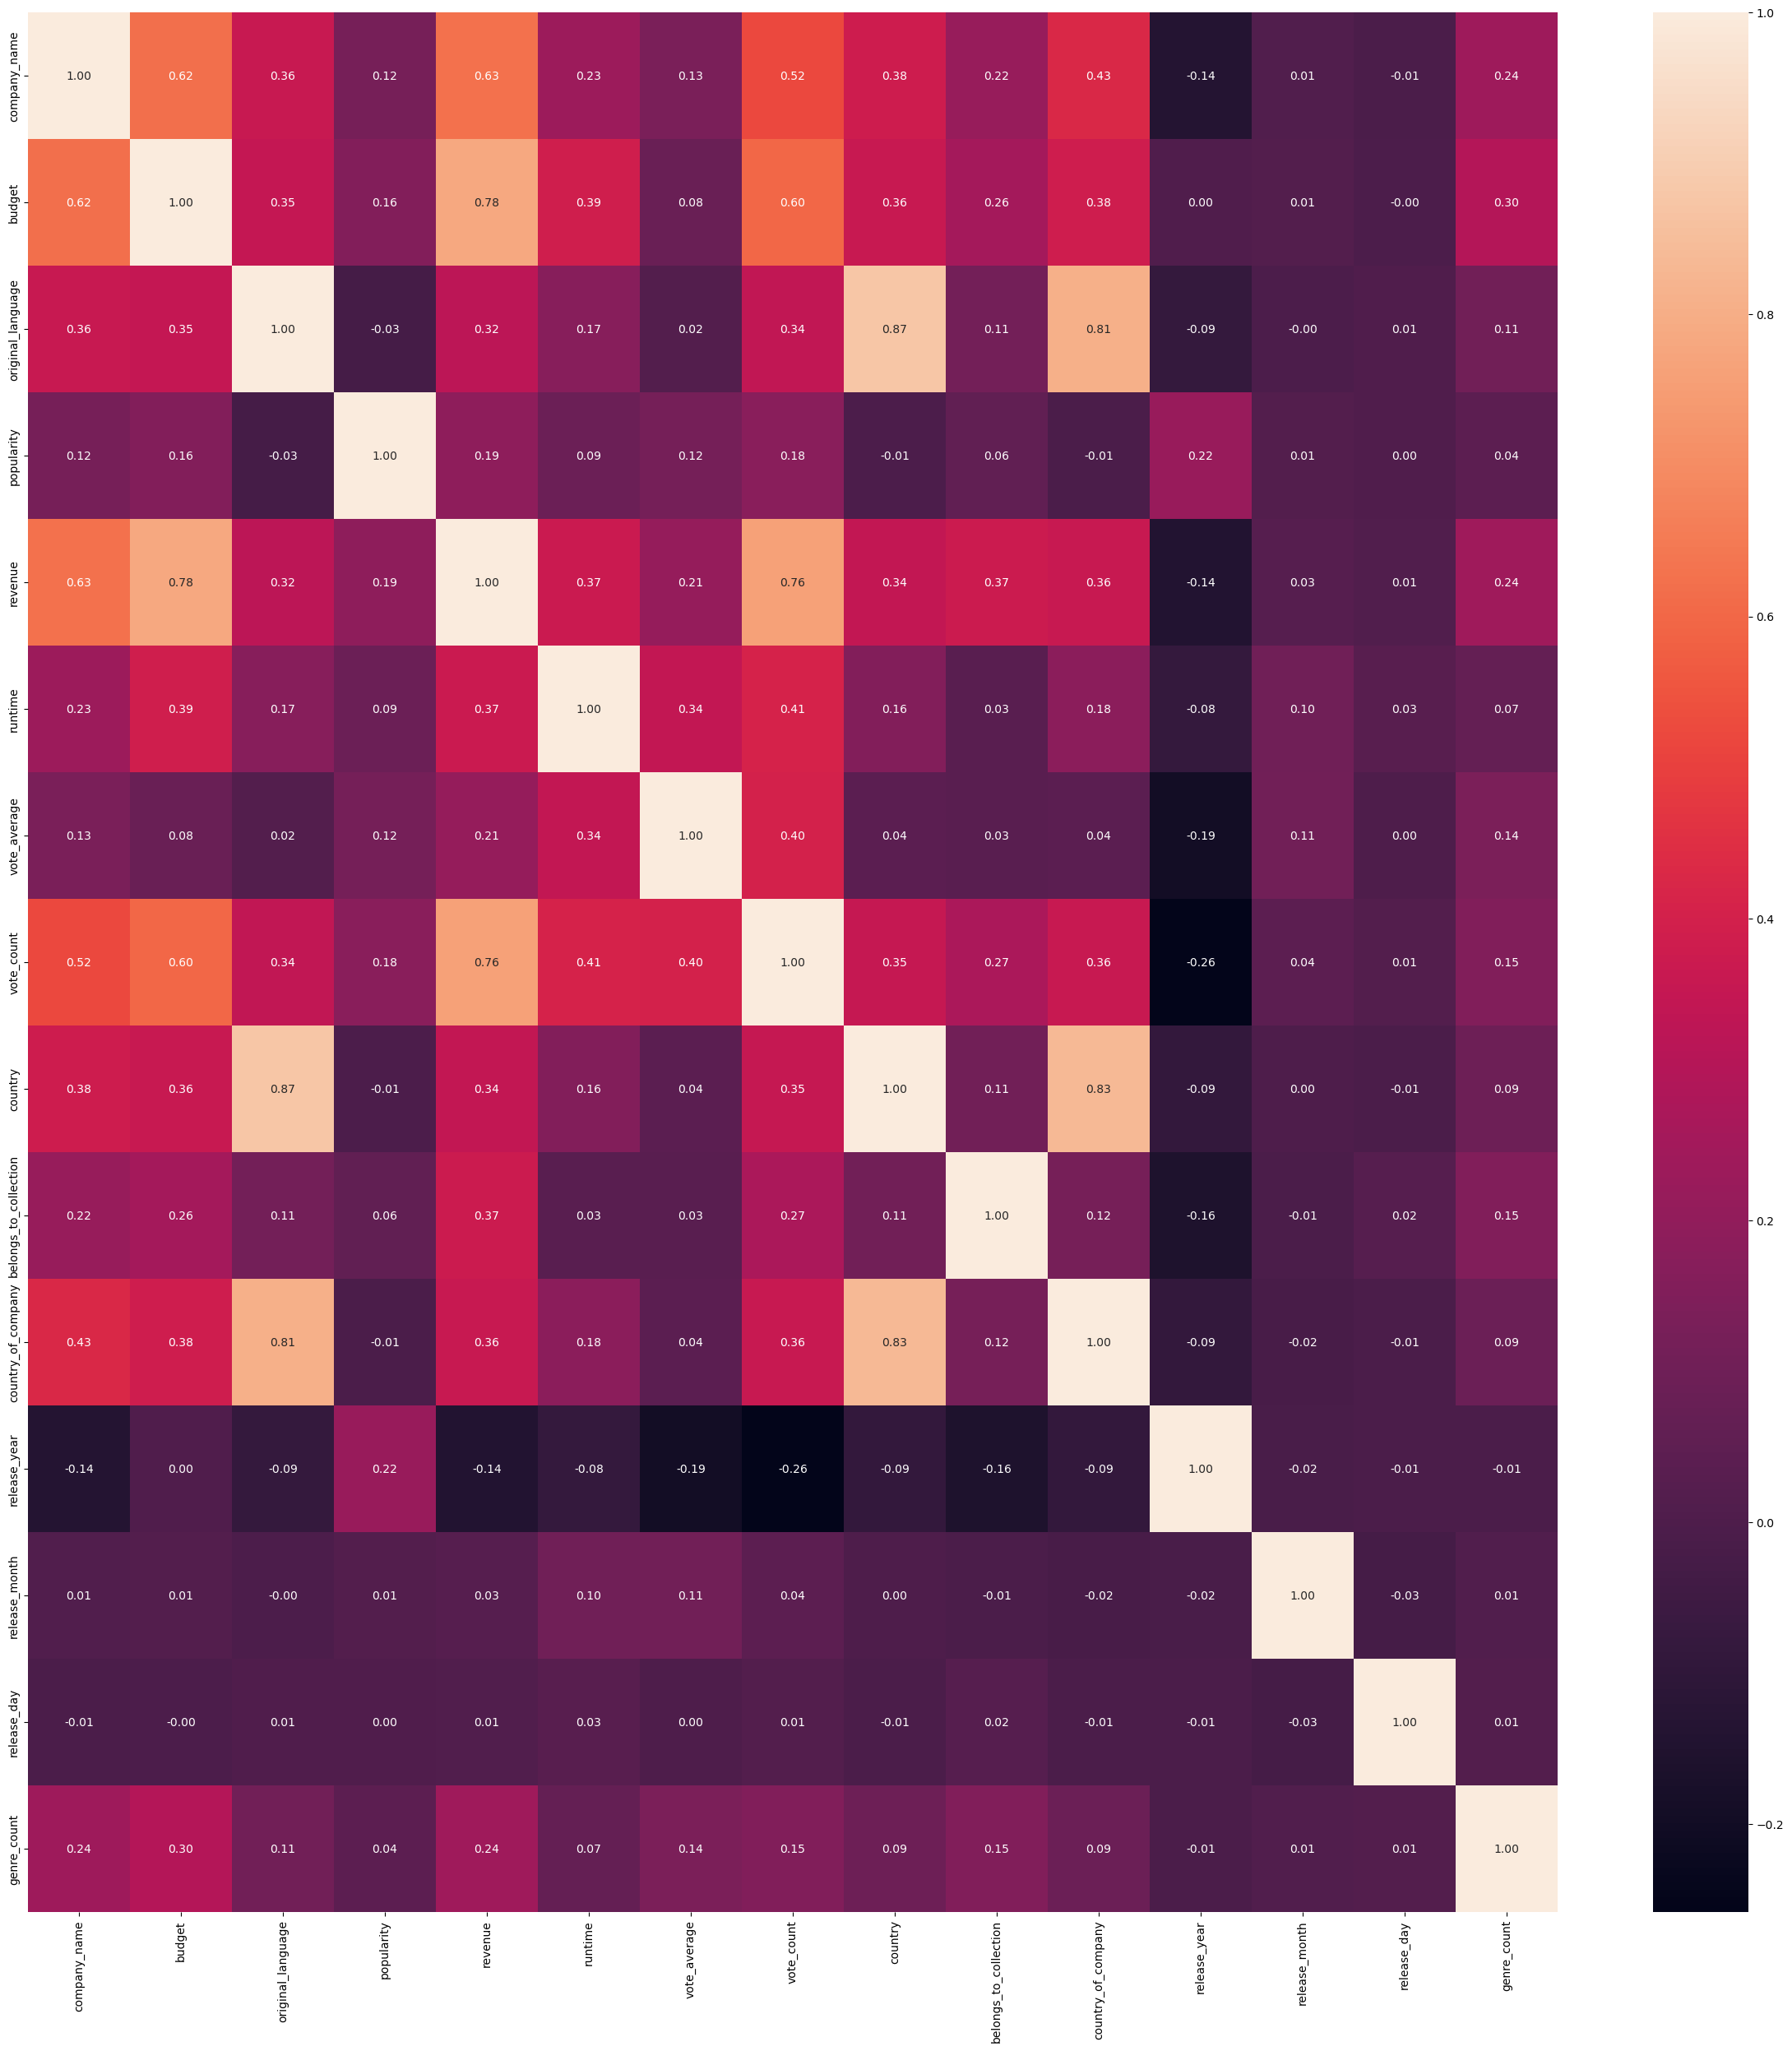

In [78]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr() , annot=True , fmt='.2f')
plt.savefig('heatmap.png')
plt.show()

# Dropping Features with Low Correlation to Target

In [80]:
df.drop(['release_day','release_month'] , axis=1 , inplace=True)

In [81]:
df.columns

Index(['company_name', 'budget', 'original_language', 'popularity', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'country',
       'belongs_to_collection', 'country_of_company', 'release_year',
       'genre_count'],
      dtype='object')

# split data into features and target

In [83]:
x = df.drop('revenue',axis=1)
y=df['revenue']

# split data into train and test

In [85]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.25,random_state=42)

# Scaling Features Using StandardScaler

In [87]:
scale_cols = ['company_name', 'country', 'budget', 'vote_average', 'vote_count','country_of_company','original_language' , 'popularity','release_year' , 'genre_count']


scaler = StandardScaler()
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

# LinearRegression model

In [89]:
results_models=[]

le = LinearRegression()

le.fit(x_train, y_train)


y_train_pred = le.predict(x_train)
y_test_pred = le.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred):.4f}")

cv_scores = cross_val_score(le, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_revenue) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_revenue) * 100

print(f"Train RMSE (% of mean revenue): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean revenue): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Linear Regression",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})


Train: 0.7662
Test : 0.7859
Cross-Validation Scores (5-Fold): [0.75132931 0.76259985 0.79447637 0.71336159 0.79760749]
Cross-Validation Accuracy (5-Fold): 0.7639
Train RMSE: 77477606.7723
Test  RMSE: 72493568.1439
Train RMSE (% of mean revenue): 51.78%
Test  RMSE (% of mean revenue): 48.45%


# PolynomialRegression model

In [91]:
poly_2 =PolynomialFeatures(degree=2)

x_train_poly=poly_2.fit_transform(x_train)
x_test_poly=poly_2.transform(x_test)

le2 = LinearRegression()

le2.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
y_train_pred = le2.predict(x_train_poly)
print(f"train: {r2_score(y_train , y_train_pred):.4f}")
y_test_pred = le2.predict(x_test_poly)
print(f"test: {r2_score(y_test , y_test_pred):.4f}")

cv_scores = cross_val_score(le2, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_revenue) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_revenue) * 100

print(f"Train RMSE (% of mean revenue): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean revenue): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Polynomial Regression (deg=2)",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

train: 0.8162
test: 0.8020
Cross-Validation Scores (5-Fold): [0.75132931 0.76259985 0.79447637 0.71336159 0.79760749]
Cross-Validation Accuracy (5-Fold): 0.7639
Train RMSE: 68697088.3119
Test  RMSE: 69721712.1620
Train RMSE (% of mean revenue): 45.91%
Test  RMSE (% of mean revenue): 46.60%


# RandomForest model

In [94]:
rf = RandomForestRegressor(
    n_estimators=200,   
    max_depth=5,      
    min_samples_split=2, 
    min_samples_leaf=1,  
    random_state=0
)

rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred):.4f}")

cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_revenue) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_revenue) * 100

print(f"Train RMSE (% of mean revenue): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean revenue): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Random Forest",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
   "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

Train: 0.8581
Test : 0.8165
Cross-Validation Scores (5-Fold): [0.79011803 0.81720198 0.8363275  0.75981368 0.84433788]
Cross-Validation Accuracy (5-Fold): 0.8096
Train RMSE: 60354465.8820
Test  RMSE: 67112482.8248
Train RMSE (% of mean revenue): 40.34%
Test  RMSE (% of mean revenue): 44.85%


# GradientBoosting model with grid search

In [96]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

results = []

for params in ParameterGrid(param_grid):
    gbr = GradientBoostingRegressor(**params, random_state=0)
    gbr.fit(x_train, y_train)

    y_train_pred = gbr.predict(x_train)
    y_test_pred = gbr.predict(x_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_rmse_pct = (train_rmse / mean_revenue) * 100
    test_rmse_pct  = (test_rmse / mean_revenue) * 100

    results.append({
        "params": params,
        "Train": train_r2,
        "Test": test_r2,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train RMSE (%)": train_rmse_pct,
        "Test RMSE (%)": test_rmse_pct,
        "(Train-Test)": abs(train_r2 - test_r2)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(
    by=["Test", "(Train-Test)", "Train"],
    ascending=[False, True, False]
)

for i in range(5):
    best = df_results.iloc[i]
    print(f"Row {i+1}")
    print("Best Parameters:", best["params"])
    print("Train:", best["Train"])
    print("Test:", best["Test"])
    print("Train RMSE:", best["Train RMSE"])
    print("Test RMSE:", best["Test RMSE"])
    print("Train RMSE (%):", best["Train RMSE (%)"])
    print("Test RMSE (%):", best["Test RMSE (%)"])
    print("|Train - Test|:", best["(Train-Test)"])
    if i != 4:
        print("=" * 40)

best_model = df_results.iloc[0]
best_params = best_model["params"]

gbr_best = GradientBoostingRegressor(**best_params, random_state=0)
gbr_best.fit(x_train, y_train)

y_train_pred = gbr_best.predict(x_train)
y_test_pred = gbr_best.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_rmse_percentage = (train_rmse / mean_revenue) * 100
test_rmse_percentage  = (test_rmse / mean_revenue) * 100

results_models.append({
    "Model": "Gradient Boosting",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

Row 1
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train: 0.892883043664687
Test: 0.8361681698666817
Train RMSE: 52444362.62813515
Test RMSE: 63419528.4874491
Train RMSE (%): 35.05056842911384
Test RMSE (%): 42.38569050315699
|Train - Test|: 0.056714873798005216
Row 2
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Train: 0.8925526328229958
Test: 0.8356033977024327
Train RMSE: 52525184.771588214
Test RMSE: 63528746.48624012
Train RMSE (%): 35.10458495115218
Test RMSE (%): 42.458685058691195
|Train - Test|: 0.056949235120563046
Row 3
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Train: 0.9243854616712284
Test: 0.835538455083245
Train RMSE: 44062826.47107564
Test RMSE: 63541293.3265056
Train RMSE (%): 29.448868038603198
Test RMSE (%): 42.46707059073422
|Trai

# DecisionTree model

In [98]:
dt = DecisionTreeRegressor(
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=0
)

dt.fit(x_train, y_train)

y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred_dt):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred_dt):.4f}")

cv_scores= cross_val_score(dt, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_dt)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_dt)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred_dt))/ mean_revenue) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred_dt))  / mean_revenue) * 100

print(f"Train RMSE (% of mean revenue): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean revenue): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Decision Tree",
    "Train": r2_score(y_train, y_train_pred_dt),
    "Test": r2_score(y_test, y_test_pred_dt),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

Train: 0.8297
Test : 0.7765
Cross-Validation Scores (5-Fold): [0.72085344 0.74749712 0.79174028 0.73868046 0.80724861]
Cross-Validation Accuracy (5-Fold): 0.7612
Train RMSE: 66124354.7520
Test  RMSE: 74066463.3293
Train RMSE (% of mean revenue): 44.19%
Test  RMSE (% of mean revenue): 49.50%


# Compare between models

In [100]:
df_models = pd.DataFrame(results_models)
print(df_models)

                           Model     Train      Test    Train RMSE  \
0              Linear Regression  0.766217  0.785932  7.747761e+07   
1  Polynomial Regression (deg=2)  0.816203  0.801989  6.869709e+07   
2                  Random Forest  0.858134  0.816533  6.035447e+07   
3              Gradient Boosting  0.892883  0.836168  5.244436e+07   
4                  Decision Tree  0.829712  0.776542  6.612435e+07   

      Test RMSE  Train RMSE (%)  Test RMSE (%)  
0  7.249357e+07       51.781241      48.450217  
1  6.972171e+07       45.912885      46.597680  
2  6.711248e+07       40.337192      44.853833  
3  6.341953e+07       35.050568      42.385691  
4  7.406646e+07       44.193429      49.501443  


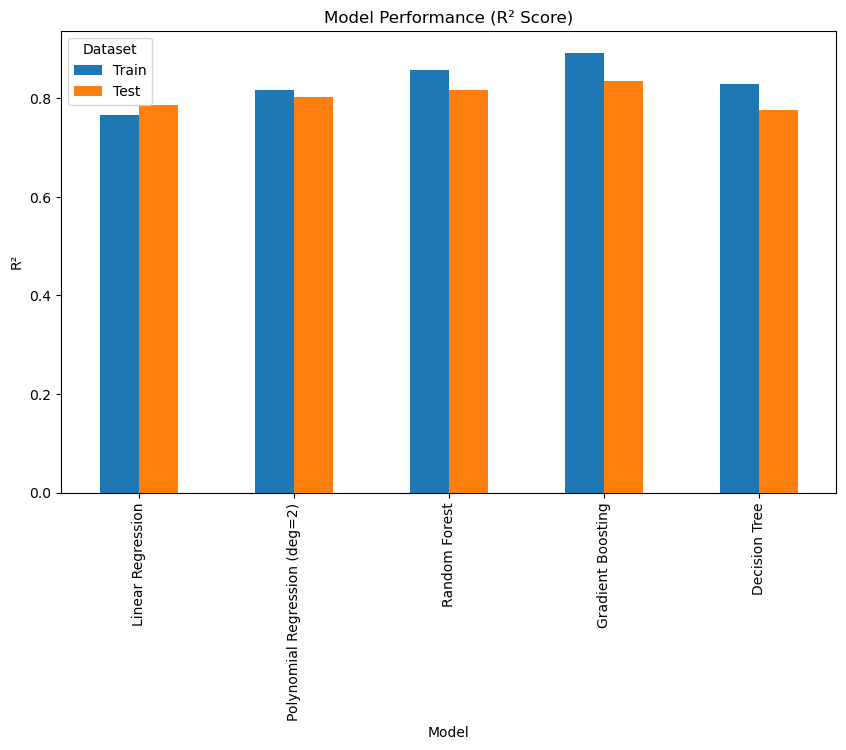

In [101]:
df_models.plot(
    x="Model",
    y=["Train", "Test"],
    kind="bar",
    figsize=(10,6)
)
plt.title("Model Performance (R² Score)")
plt.ylabel("R²")
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.savefig("compare_between_models.png")
plt.show()

### Overall Model Performance: All models show relatively high R² scores, indicating that they explain a significant portion of the variance in the target variable. Test scores range from around 0.78 to 0.84, reflecting good predictive performance.

## Comparison Across Models:

### Linear Regression has the lowest training and testing R², suggesting it is the least effective among the tested models.

### Polynomial Regression (degree=2) and Random Forest perform moderately well, with training R² slightly higher than testing, indicating some minor overfitting.

### Gradient Boosting and Decision Tree achieve the highest training R² (≈0.89) and strong test R² (≈0.84), suggesting they capture patterns in the data effectively, although the gap between training and testing indicates slight overfitting.

### Overfitting Considerations: Models like Gradient Boosting and Decision Tree exhibit higher training than testing R², signaling mild overfitting. Models with smaller gaps, like Linear and Ridge Regression, generalize better but may underfit slightly.

# Deployment

In [104]:
import joblib

file='ValueClassifier'
joblib.dump(rf , "ValueClassifier")
model = joblib.load(open("ValueClassifier",'rb'))
joblib.dump(encoder , "encode")
encod = joblib.load(open("encode", 'rb'))
joblib.dump(scaler , "scaler")
scal = joblib.load(open("scaler", 'rb'))

outlier_bounds = {}
for col in ['budget','popularity','revenue','runtime','vote_average','vote_count']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)

joblib.dump(outlier_bounds, 'outlier_bounds')
outlier_bounds = joblib.load(open("outlier_bounds", 'rb'))